# Hierarchical Clustering

## Objectives

- Understand and apply hierarchical clustering methods to various datasets.
- Explore different linkage criteria and their impacts on cluster formation.
- Evaluate clustering performance using external validation measures.

## Background

Hierarchical Clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It involves creating clusters with a predetermined ordering from top to bottom, for instance, using various linkage criteria.

## Datasets Used

- A simple synthetic dataset generated with make_blobs to illustrate primary hierarchical Clustering.
- The Iris dataset to demonstrate hierarchical Clustering in a real-world scenario.

## A Simple Example

In [1]:
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import AgglomerativeClustering

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score, fowlkes_mallows_score

import ClusterVisualizer as cv

import plotly.express as px
import matplotlib.pyplot as plt

Let's generate a simple dataset with 10 values in 2D.

In [2]:
from sklearn.datasets import make_blobs

# Generating data
X, _ = make_blobs(random_state=2, n_samples=10)

data_labels = np.array([i for i in range(X.shape[0])])

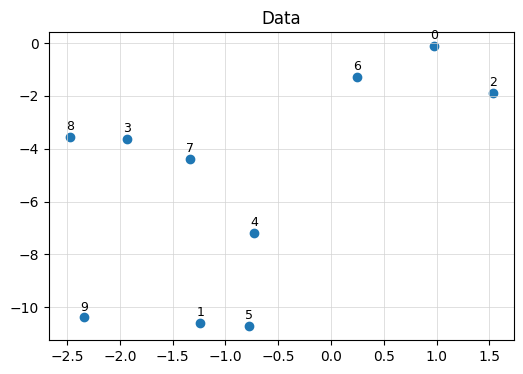

In [3]:
# Plotting the data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data')
for i, txt in enumerate(data_labels):
    plt.annotate(txt, (X[i, 0], X[i, 1]), textcoords="offset points", 
                 xytext=(0,5), ha='center', color='k', size=9)
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)  
plt.show()    

In [4]:
# Perform hierarchical clustering
Z = linkage(X, 'ward')

A dendrogram is a hierarchical tree-like diagram to visualize the arrangement of data points or clusters.

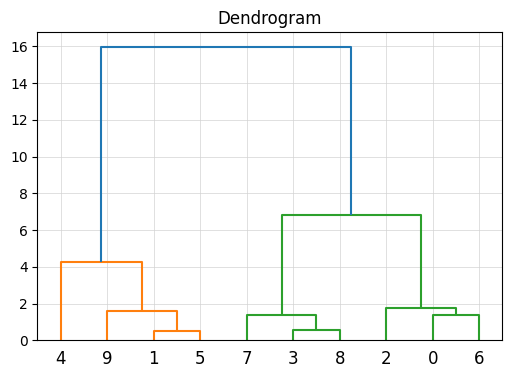

In [5]:
plt.figure(figsize=(6, 4))
dendrogram(Z)
plt.title('Dendrogram')
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5) ;

In dendrograms, 
- The x-axis corresponds to the individual points or merged clusters. 
- The y-axis represents the distance or dissimilarity between clusters being linked. 

Reading from bottom to top, the data points `1` and `5` are joined first. Next, points `3` and `8` are joined into a cluster, and so on. At the top level, there are two branches, one consisting of points `4`, `9`, `1`, and `5`, and the other with the rest. Those correspond to the two largest clusters in the dendrogram.

### Linkage Criteria

Linkage criteria in hierarchical clustering define how to compute the distance or similarity between clusters, such as by using the minimum (`single`), maximum (`complete`), average (`average`) distance or Ward's method (`ward`).

Let's define a function for plotting the dendrogram with a threshold, and the associate scatter plot with the clusters.

In [6]:
def plot_clusters_from_dendrogram(X, method='ward', threshold=1):
    '''
    Plot the dendrogram with a threshold, and the associate scatter plot with the clusters.
    '''
    # Getting data labels
    data_labels = np.array([i for i in range(X.shape[0])])

    # Perform hierarchical clustering
    Z = linkage(X, method=method)
        
    plt.figure(figsize=(10, 4))
    
    # Plot the dendrogram
    plt.subplot(121)
    dendrogram(Z)
    plt.title('Dendrogram - (%s method)' % method)
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distance')
    plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)      
    plt.axhline(y=threshold, color='grey', linestyle='--')            

    # Plot the scatter
    plt.subplot(122)
    # Extracting cluster labels
    labels = fcluster(Z, threshold, criterion='distance')
    num_clusters = len(np.unique(labels))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='gist_rainbow')
    plt.title('Scatter Plot - (%d clusters)' % num_clusters)
    for i, txt in enumerate(data_labels):
        plt.annotate(txt, (X[i, 0], X[i, 1]), textcoords="offset points", 
                     xytext=(0,5), ha='center', color='k', size=9)
    plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)  
    plt.show()

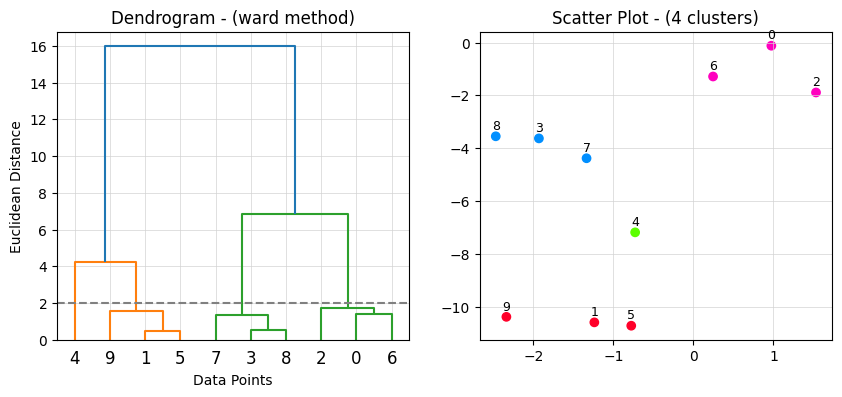

In [7]:
plot_clusters_from_dendrogram(X, threshold=2)

For `X`, with a threshold of 2, the hierarchical clustering algorithm creates 4 clusters. 

If we change the threshold, the algorithm produces different cluster configurations.

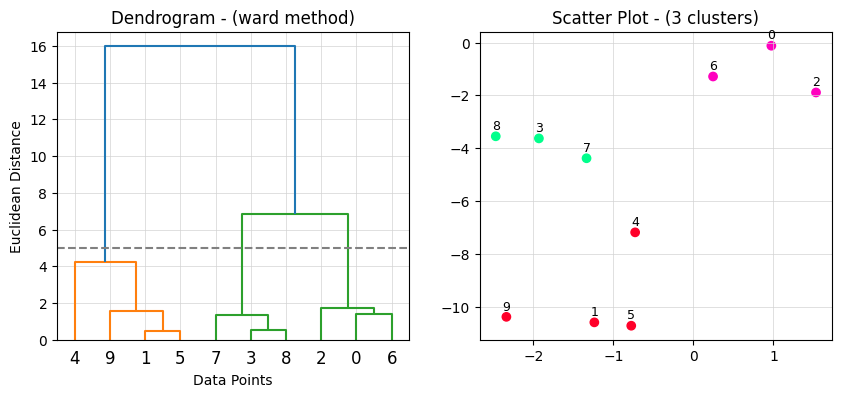

In [8]:
plot_clusters_from_dendrogram(X, method='ward', threshold=5)

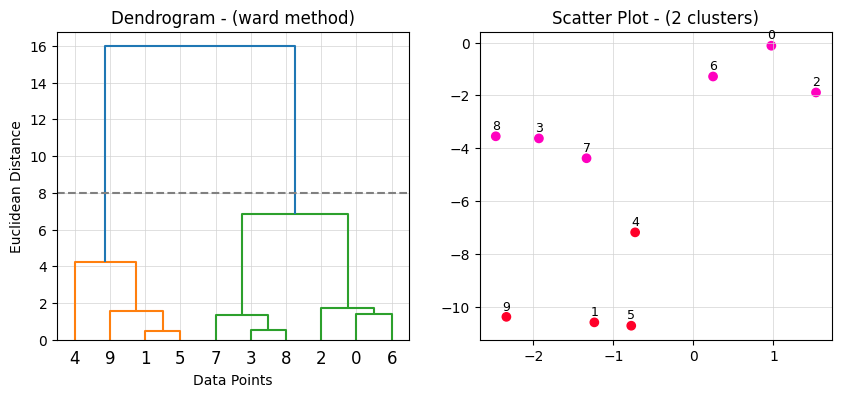

In [9]:
plot_clusters_from_dendrogram(X, method='ward', threshold=8)

Modifying the linkage method could produce different cluster configurations, since clusters merge in a different way.

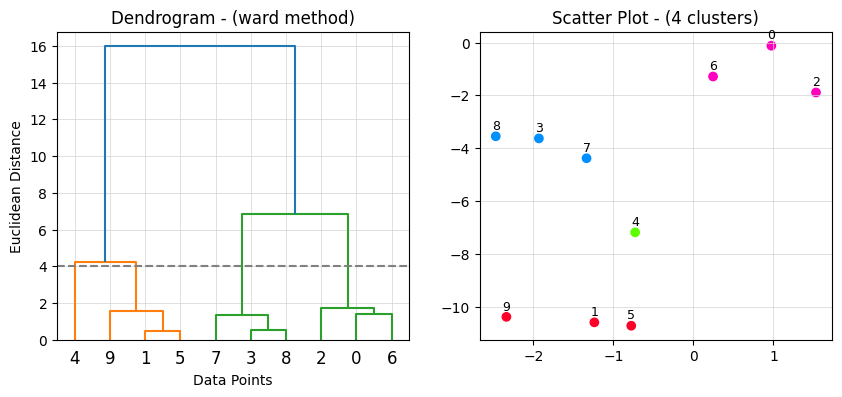

In [10]:
# method='ward' is the default method for linkage
plot_clusters_from_dendrogram(X, method='ward', threshold=4)

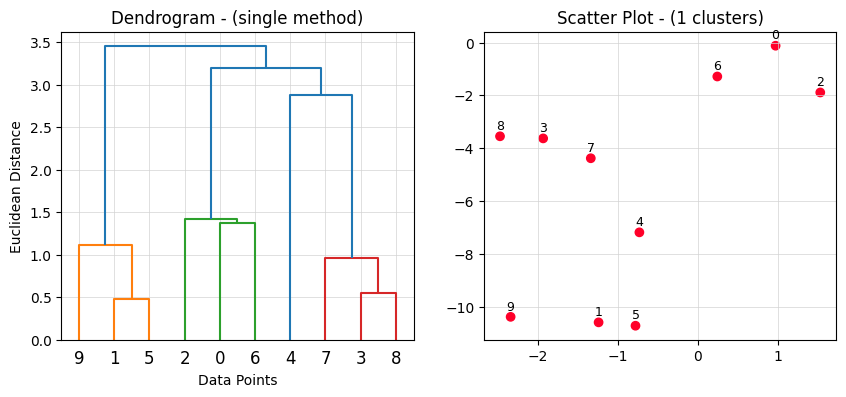

In [11]:
# method='single' 
plot_clusters_from_dendrogram(X, method='single', threshold=4)

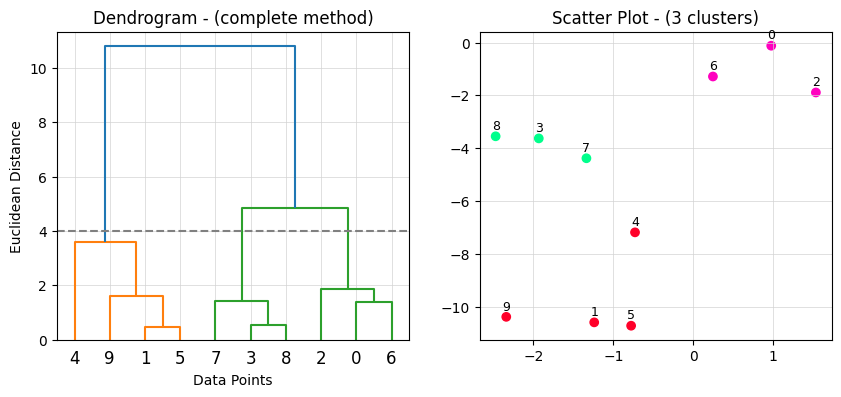

In [12]:
# method='complete' 
plot_clusters_from_dendrogram(X, method='complete', threshold=4)

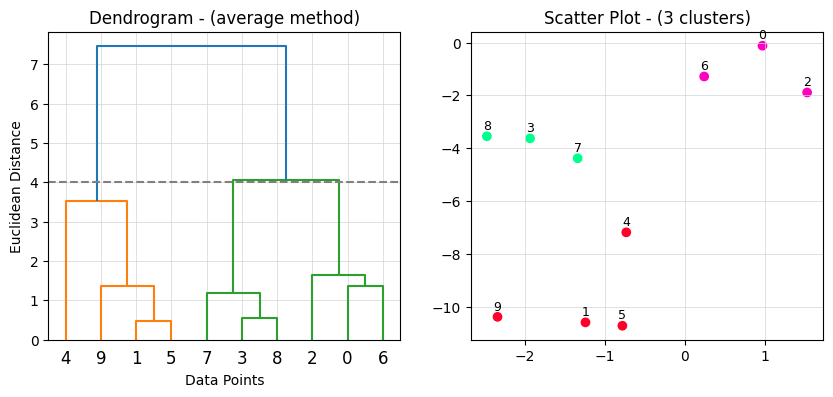

In [13]:
# method='average' 
plot_clusters_from_dendrogram(X, method='average', threshold=4)

## Agglomerative Method

In [14]:
# Generating data
X2, y2 = make_blobs(n_samples=400, centers=4, cluster_std=1.8, random_state=10)

df_X2 = pd.DataFrame(X2, columns=['X', 'Y'])

In [15]:
# Plotting the data
cv_X2 = cv.ClusterVisualizer(df_X2, y2)

cv_X2.plot_data()

In [16]:
cv_X2.plot_data_with_true_labels()

In [17]:
# Apply Agglomerative Clustering with Ward linkage
y_w4 = AgglomerativeClustering(n_clusters=4, linkage='ward').fit_predict(X2)

# Saving the cluster labels
agg_labels = pd.DataFrame()
agg_labels['Ward-4'] = y_w4

# Plotting the clusters
cv_X2.plot_clusters(y_w4, title='Agglomerative Clustering - Ward Linkage')

In [18]:
# Apply Agglomerative Clustering with Ward linkage
y_w3 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X2)
agg_labels['Ward-3'] = y_w3

cv_X2.plot_clusters(y_w3, title='Agglomerative Clustering - Single Linkage')

In [19]:
# Apply Agglomerative Clustering with single linkage
y_s4 = AgglomerativeClustering(n_clusters=4, linkage='single').fit_predict(X2)
agg_labels['Single-4'] = y_s4

cv_X2.plot_clusters(y_s4, title='Agglomerative Clustering - Single Linkage')

In [20]:
# Apply Agglomerative Clustering with single linkage
y_s3 = AgglomerativeClustering(n_clusters=3, linkage='single').fit_predict(X2)
agg_labels['Single-3'] = y_s3

cv_X2.plot_clusters(y_s3, title='Agglomerative Clustering - Single Linkage')

In [21]:
# Apply Agglomerative Clustering with complete linkage
y_c4 = AgglomerativeClustering(n_clusters=4, linkage='complete').fit_predict(X2)
agg_labels['Complete-4'] = y_c4

cv_X2.plot_clusters(y_c4, title='Agglomerative Clustering - Complete Linkage')

In [22]:
# Apply Agglomerative Clustering with complete linkage
y_c3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit_predict(X2)
agg_labels['Complete-3'] = y_c3

cv_X2.plot_clusters(y_c3, title='Agglomerative Clustering - Complete Linkage')

In [23]:
# Apply Agglomerative Clustering with average linkage
y_a4 = AgglomerativeClustering(n_clusters=4, linkage='average').fit_predict(X2)
agg_labels['Average-4'] = y_a4

cv_X2.plot_clusters(y_a4, title='Agglomerative Clustering - Average Linkage')

In [24]:
# Apply Agglomerative Clustering with average linkage
y_a3 = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X2)
agg_labels['Average-3'] = y_a3

cv_X2.plot_clusters(y_a3, title='Agglomerative Clustering - Average Linkage')

## External Validation Meassures

External validation measures for clustering assess the quality of clustering results by comparing them to known ground truth or predefined labels in the data.

In [25]:
agg_labels.head()

,Ward-4,Ward-3,Single-4,Single-3,Complete-4,Complete-3,Average-4,Average-3
0,3,0,0,2,0,1,0,0
1,1,0,0,2,2,2,3,0
2,3,0,0,2,0,1,0,0
3,2,2,1,0,3,0,2,2
4,2,2,1,0,3,0,2,2


### The Adjusted Rand Index

The Adjusted Rand Index (ARI) is an external validation measure that quantifies the agreement between two data clusterings. Its values range from -1 (no agreement) to 1 (perfect agreement), where 0 indicates random clustering.

In [26]:
cv_X2.plot_adjusted_rand(agg_labels, title='Agglomerative Clustering')

### The Adjusted Mutual Information Score

The Adjusted Mutual Information (AMI) Score is an external validation measure that quantifies the mutual information between two clusterings,  with a range from 0 (no mutual information) to 1 (perfect agreement).

In [27]:
cv_X2.plot_adjusted_mutual_info(agg_labels, title='Agglomerative Clustering')

### The Normalized Mutual Info Score

The Normalized Mutual Information (NMI) Score is a measure of the similarity between two clusterings, normalized to fall within the range [0, 1], where 0 indicates no shared information and 1 indicates perfect agreement between the clusterings.

In [28]:
cv_X2.plot_normalized_mutual_info(agg_labels, title='Agglomerative Clustering')

### The Fowlkes Mallows Score

The Fowlkes-Mallows Score is an external validation metric that measures the similarity between two clusterings based on the geometric mean of precision and recall, with its range from 0 (no agreement) to 1 (perfect agreement).

In [29]:
cv_X2.plot_fowlkes_mallows(agg_labels, title='Agglomerative Clustering')

## Iris Dataset

In [30]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# Create a grouped box plot
df_melted = pd.melt(df, id_vars=['species'])

# Create a box plot with the original data
fig_o = px.box(df_melted, x='variable', y='value', 
             width=700, height=400, title='Boxplot of Original Iris Features')
# Change the legend position to 'top'
fig_o.update_layout(legend=dict(x=0.4, y=1.2, orientation='h'))
# Show the plot
fig_o.show()

In [32]:
# Standardize the data
scaler = StandardScaler()

dfS = pd.DataFrame(scaler.fit_transform(df[['sepal length (cm)', 
                    'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]), 
                    columns=df.columns[:-1])
dfS['species'] = df['species']
dfS.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [33]:
# Create a box plot with the standardized data
dfS_melted = pd.melt(dfS, id_vars=['species'])

fig_s = px.box(dfS_melted, x='variable', y='value', 
               width=700, height=400, title='Boxplot of Standardized Iris Features')
# Change the legend position to 'top'
fig_s.update_layout(legend=dict(x=0.4, y=1.2, orientation='h'))
# Show the plot
fig_s.show()

### Using t-SNE for plotting the clusters

We will use the technique "t-Distributed Stochastic Neighbor Embedding" (t-SNE) to visualize the clusters effectively.

In [34]:
# TSNE (for visualization only) 
tsne = TSNE(n_components=2)
tsne.fit(dfS.iloc[:, :-1])
df_tsne = pd.DataFrame(tsne.fit_transform(dfS.iloc[:, :-1]), columns=['t-SNE_1', 't-SNE_2'])

In [35]:
# Plotting the t-SNE Space
cv_i = cv.ClusterVisualizer(df_tsne, dfS['species'])
cv_i.plot_data()

In [36]:
cv_i.plot_data_with_true_labels()

In [37]:
# Agglomerative Clustering
n_clusters = 3

ag = AgglomerativeClustering(n_clusters=n_clusters).fit(dfS.iloc[:, :-1])
df_tsne['Agglomerative'] = ag.labels_.astype(str)

# Plot the clusters in the t-SNE space
cv_i.plot_clusters(ag.labels_, title='Agglomerative Clustering')

### External Validation Measures

In [38]:
print("Adjusted Rand Index           = %.4f" % adjusted_rand_score(dfS.species, ag.labels_))
print("Adjusted Mutual Information   = %.4f" % adjusted_mutual_info_score(dfS.species, ag.labels_))
print("Normalized Mutual Information = %.4f" % normalized_mutual_info_score(dfS.species, ag.labels_))
print("Fowlkes-Mallows Index         = %.4f" % fowlkes_mallows_score(dfS.species, ag.labels_))

Adjusted Rand Index           = 0.6153
Adjusted Mutual Information   = 0.6713
Normalized Mutual Information = 0.6755
Fowlkes-Mallows Index         = 0.7498


- An Adjusted Rand Index of `0.6153` indicates a moderate level of agreement between the true class labels and the cluster assignments.
- An Adjusted Mutual Information Score of 0.6713 indicates a moderate level of mutual information between the true class labels and the cluster assignments. 
- A Normalized Mutual Information of 0.6755 indicates a moderate level of mutual information between the true class labels and the cluster assignments
- A Fowlkes-Mallows Index (FMI) of 0.7498 indicates a moderate level of similarity between the true class labels and the cluster assignments.

In [39]:
crosstab = pd.crosstab(dfS.species, ag.labels_).reset_index()

long_crosstab = crosstab.melt(id_vars='species', var_name='Cluster', value_name='Count')
fig_c = px.bar(long_crosstab, x='species', y='Count', color='Cluster', barmode='group',
               labels={'species': 'Species'})
fig_c.update_layout(title='Species Count by Cluster',
                    width=600, height=400, legend_title='Cluster',
                    xaxis_title='Species', yaxis_title='Count')
fig_c.show()

- Cluster 1 is almost entirely composed of setosa species.
- Cluster 2 has elements from all three species, but mainly from versicolor.
- Cluster 0 is divided between versicolor and virginica species. It is te worst cluster because it merges several cases of both species.

## Conclusions

Key Takeaways:
- Hierarchical Clustering with various linkage methods produces different cluster configurations, demonstrating the sensitivity of the method to the choice of linkage.
- Agglomerative Clustering effectively grouped the Iris dataset into species-based clusters, although some misclassifications occurred, particularly when merging versicolor and virginica species.
- External validation scores, such as the Adjusted Rand Index and the Fowlkes-Mallows Index, provided moderate agreement between the true class labels and the clusters assigned by hierarchical methods.

## References

- https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
- https://archive.ics.uci.edu/dataset/53/iris
- Muller, A.C. & Guido, S. (2017) Introduction to Machine Learning with Python. A guide for Data scientists. USA: O'Reilly, chapter 3.
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O'Reilly Media, Inc. chapter 5.